# Some thesis idea figures

In [1]:
import matplotlib.style

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from numpy import array as arr

In [3]:
def spherical_y(x,r):
    # x^2+y^2=r^2
    # y=sqrt(r^2-x^2)
    return np.sqrt(r**2-x**2)

In [4]:
mountColor = "#353535"
mountFillColor='#252525'

In [5]:
def laser_2(ax, xi, yi, thickness, length, laserargs={}, orientation='hor'):
    if orientation=='hor':
        xpts = [xi, xi+length]
        yp1 = [yi-thickness/2, yi-thickness/2]
        yp2 = [yi+thickness/2, yi+thickness/2]
        laser(ax, xpts, yp1, yp2, laserargs)
        return xi+length, yi
    else:
        xpts = [xi-thickness/2, xi+thickness/2]
        yp1 = [yi, yi]
        yp2 = [yi+length, yi+length]
        laser(ax, xpts, yp1, yp2, laserargs)
        return xi, yi+length

In [6]:
def laser(ax, x, y1, y2, laserargs):
    ax.plot(x, y1, **laserargs)
    ax.plot(x, y2, **laserargs)
    ax.fill_between(x,y1,y2, **laserargs)
    return x[-1], y1[-1], y2[-1]

In [7]:
def laserx(ax, y, x1, x2, laserargs):
    ax.plot(x1, y, **laserargs)
    ax.plot(x2, y, **laserargs)
    ax.fill_betweenx(y, x1, x2, **laserargs)
    return y[-1], x1[-1], x2[-1]

In [8]:
def rect(ax, x,y,width,height, plotArgs={}, fillArgs={}, orientation='vert'):
    if orientation=='vert':
        left = x
        right = x+width
        top = y + height/2
        bot = y - height/2
        # make a box
        xpts = [left,right,right,left,left] 
        ypts = [bot,bot,top,top,bot]
        ax.plot(xpts, ypts, **plotArgs);
        ax.fill_between([left, right], [bot, bot], [top, top],**fillArgs)
    else:
        left = x-width/2
        right = x+width/2
        top = y + height
        bot = y
        # make a box
        xpts = [left,right,right,left,left] 
        ypts = [bot,bot,top,top,bot]
        ax.plot(xpts, ypts, **plotArgs);
        ax.fill_between([left, right], [bot, bot], [top, top],**fillArgs)        
    return xpts, ypts

In [9]:
def aom(ax, x, y, Hoffset, height, width, borderArgs={}, fillArgs={}, text='', fontargs={}):
    xpts, ypts = rect(ax, x, y+Hoffset, width, height, plotArgs=borderArgs, fillArgs=fillArgs)
    plt.text(x+width/10, y+Hoffset-0.4*height, text, **fontargs)
    return x+width

In [88]:
def relay(ax, xp, yp, lt, relayFL, lensargs={}, laserargs={}, includeFocusing=True, fractionAround=1, fillArgs=None):    
    # laser through relay between AOMs
    fa = fractionAround
    if includeFocusing:
        laser(ax,[xp,xp+relayFL*fa, xp+(2+fa)*relayFL, xp+(2+2*fa)*relayFL], [yp+lt/2,yp+lt/2, yp-lt/2, yp-lt/2],
                 [yp-lt/2,yp-lt/2, yp+lt/2, yp+lt/2], laserargs)
    else:
        laser(ax,[xp,xp+fa*relayFL], [yp+lt/2,yp+lt/2], [yp-lt/2,yp-lt/2], laserargs)
        laser(ax,[xp+(2+fa)*relayFL, xp+(2+2*fa)*relayFL], [yp-lt/2, yp-lt/2], [yp+lt/2, yp+lt/2], laserargs)
    lens(ax, xp+fa*relayFL, yp, 0.1, abs(relayFL)/2, lensargs, fillargs=fillArgs);
    lens(ax, xp+(2+fa)*relayFL, yp, 0.1, abs(relayFL)/2, lensargs, fillargs=fillArgs);
    xp += (2+2*fa)*relayFL 
    return xp, yp

In [11]:
def rotate(x,y, theta):
    return [x * np.cos(theta) - y*np.sin(theta), x * np.sin(theta) + y*np.cos(theta)]

In [12]:
def mirror(ax, x, y, theta, size=1, plotArgs={'color':'c'}):
    """
    orientation takes from 0-7
    """
    off = size/(2*np.sqrt(2))
    mOff1 = rotate( -size/2, 0, theta)
    mOff2 = rotate(  size/2, 0, theta)
    ax.plot([x+mOff1[0], x+mOff2[0]], [y+mOff1[1], y+mOff2[1]],linewidth=3, **plotArgs)
    numHash=10
    for num in range(numHash):
        spacing = size/(numHash-1)
        mb1 = rotate(-size/2+num*spacing, 0, theta)
        mb2 = rotate(-size/2+(num+1)*spacing, size/10, theta)
        ax.plot([x+mb1[0],x+mb2[0]], [y+mb1[1], y+mb2[1]], **plotArgs)

In [13]:
def waveplate(ax, x, y, plotArgs={}, fillArgs={}, size=0.5, theta=0):
    rect2(ax, x, y, 0.1, size, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta);

In [14]:
def quarterWaveplate(ax, x, y, size=0.5, theta=0):
    waveplate(ax, x, y, plotArgs={'color':'#D7BE69'}, fillArgs={'color':'#D7BE69', 'alpha':0.4}, theta=theta, size=size)

In [15]:
def halfWaveplate(ax, x, y, size=0.5, theta=0):
    waveplate(ax, x, y, plotArgs={'color':'#FFA500'}, fillArgs={'color':'#FFA500', 'alpha':0.6}, theta=theta, size=size)

In [16]:
def iris(ax, x, y, orientation='vert', outerSize=1, innerSize=0.1, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}):
    halfIrisSize=(outerSize-innerSize)/2
    th = 0.05
    if orientation=='vert':
        rect(ax, x, y+(outerSize+innerSize)/4, th, halfIrisSize, plotArgs=plotArgs, fillArgs=fillArgs)
        rect(ax, x, y-(outerSize+innerSize)/4, th, halfIrisSize, plotArgs=plotArgs, fillArgs=fillArgs)
    else:
        rect(ax, x-(outerSize+innerSize)/4, y, halfIrisSize, 0.05, plotArgs=plotArgs, fillArgs=fillArgs, orientation='hor')
        rect(ax, x+(outerSize+innerSize)/4, y, halfIrisSize, 0.05, plotArgs=plotArgs, fillArgs=fillArgs, orientation='hor')

In [17]:
def window(ax, x, y, theta, size=1, thickness=0.2, plotArgs={'color':'w', 'alpha':0.1}, fillArgs={'color':'w', 'alpha':0.1}):
    points = [[-size/2, -thickness/2], [size/2,-thickness/2], [size/2,thickness/2], [-size/2, thickness/2], [-size/2, -thickness/2]]
    rPoints = [rotate(p[0], p[1],  theta) for p in points]
    shPoints = np.array([[x + p[0], y+p[1]] for p in rPoints ])
    ax.plot(shPoints[:,0], shPoints[:,1], **plotArgs)
    ax.fill(shPoints[:,0], shPoints[:,1], **fillArgs)

In [65]:
def focusingTweezerArray(ax, xp, yp, initW, laserargs={}, nt=3, spacing=0.2, focalLength=1, distanceBeyondF=0.3,orientation='vert', offset=0):
    #laserargs['alpha']/=nt
    if orientation=='vert':
        xl = xp-initW/2
        xr = xp + initW/2
        for n in range(nt):
            dxl = - spacing*(n-(nt-1)/2) + initW/2 + offset
            dxl = dxl + dxl*distanceBeyondF/focalLength
            dxr = spacing*(n-(nt-1)/2) + initW/2 - offset
            dxr = dxr + dxr*distanceBeyondF/focalLength
            yf = yp + focalLength + distanceBeyondF
            laserx(ax, [yp, yf], [xl, xl + dxl ],[xr, xr-dxr], laserargs)
    else:
        yt = yp + initW/2
        yb = yp - initW/2
        for n in range(nt):
            dyt = - spacing*(n-(nt-1)/2) + initW/2 + offset
            dyt = dyt + dyt*distanceBeyondF / focalLength
            dyb = spacing*(n-(nt-1)/2) + initW/2 - offset
            dyb = dyb + dyb*distanceBeyondF / focalLength
            
            xf = xp + focalLength + distanceBeyondF
            laser(ax, [xp, xf], [yb, yb + dyb ],[yt, yt-dyt], laserargs)

In [107]:
def cell(ax, x, y, h=1, wt=0.25, lensfillArgs=None, lensPlotArgs=None):
    w=(1+2/np.sqrt(2))*h
    lt = 0.06
    cellColor='w'
    window(ax, x, y+h/2+wt/2, 0, size=w, thickness=wt, plotArgs=lensPlotArgs, fillArgs=lensfillArgs)
    window(ax, x, y-h/2-wt/2, 0, size=w, thickness=wt, plotArgs=lensPlotArgs, fillArgs=lensfillArgs)
    window(ax, x-w/2-wt/2, y, np.pi/2, size=1, thickness=wt, plotArgs=lensPlotArgs, fillArgs=lensfillArgs)
    window(ax, x+w/2+wt/2, y, np.pi/2, size=1, thickness=wt, plotArgs=lensPlotArgs, fillArgs=lensfillArgs)
    ax.add_artist(plt.Circle((x,y), h/2-lt/2, color=cellColor, alpha=0.2, lw=3, fill=False))
    ax.add_artist(patches.Ellipse((x-h/2-h/(2*np.sqrt(2)),y), h/np.sqrt(2)-lt, h-lt, color=cellColor, alpha=0.2, lw=3, fill=False))
    ax.add_artist(patches.Ellipse((x+h/2+h/(2*np.sqrt(2)),y), h/np.sqrt(2)-lt, h-lt, color=cellColor, alpha=0.2, lw=3, fill=False))
    ax.plot([x-h/2, x-h/2], [y-h/2, y+h/2], linestyle='-', color=cellColor, alpha=0.2)
    ax.plot([x+h/2, x+h/2], [y-h/2, y+h/2], linestyle='-', color=cellColor, alpha=0.2)

In [20]:
def objective(ax, x, y, size=0.75, text='',fontArgs={}, orientation='hor', fillArgs={'color':'#AAAAAA'}, textYOff=0):
    # High-NA lens
    w, h = arr((4,3))*size
    fx, fy = arr((0.85, 0.2))
    if orientation=='hor':
        plt.text(x+w/10, y+0.4*h+textYOff, text, **fontArgs)
        ax.fill([x, x+fx*w, x+w, x+w,x+fx*w,x,x], [y-h/2,y-h/2,y-h/2+fy*h,y+h/2-fy*h,y+h/2,y+h/2,y-h/2], **fillArgs)    
        return x+w, y
    else:
        plt.text(x-0.32*w, y+h/10+textYOff, text, **fontArgs)
        ax.fill([x-h/2, x-h/2, x-h/2+fy*h, x+h/2-fy*h, x+h/2, x+h/2, x-h/2], [y, y+fx*w, y+w, y+w,y+fx*w,y,y], **fillArgs)    
        return x, y+w

In [48]:
def cube(ax, x, y, size=1, plotArgs={}, fillArgs={}, text='PBS', fontargs={'color':'w'}, textXAdjust=0, theta=0):
    xpts, ypts = rect2(ax, x, y, size, size, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    plt.text(x+size/20-0.4*size+textXAdjust, y-0.4*size, text, **fontargs)
    divPts = [[-size/2, -size/2], [+size/2, +size/2]]
    rDivPts = np.array([rotate(p[0],p[1],theta) for p in divPts])
    ax.plot(x+rDivPts[:,0], y+rDivPts[:,1], **plotArgs)
    return x + size

In [154]:
def deformableMirror(ax, x, y, fillArgs={'color':mountFillColor}, textArgs={'color':'w'}):
    mirror(ax, x, y, 3*np.pi/2, size=0.2)
    rect(ax, x+0.05, y, 0.25, 1.5, fillArgs=fillArgs)
    cable2(ax, x+0.3, y, 2, vScale=0.05, cableThickness=0.75, extralines=10, cablePlotArgs={'color':'#B0B0B0', 'alpha':0.5}, cableFillArgs={'color':'#B0B0B0', 'alpha':0.5})
    ax.text(x+0.35, y+0.5, 'Deformable\nMirror', **textArgs)

In [137]:
def cable2(ax, x, y, length, vScale=0.25, freq=6, cableThickness=0.1, cablePlotArgs={'color':'b', 'alpha':0.5}, cableFillArgs={'color':'b', 'alpha':0.5}, extralines=0, theta=0, xOff=0):
    xpts = np.linspace(xOff,xOff+length,100)
    ypts = np.sin(freq*xpts)*vScale+cableThickness/2
    ypts2 = ypts-cableThickness
    pts1 = np.array([rotate(x,y,theta) for x,y in zip(xpts,ypts)])
    pts2 = np.array([rotate(x,y,theta) for x,y in zip(xpts,ypts2)])
    ax.plot(x+pts1[:,0],y+pts1[:,1], **cablePlotArgs)
    ax.plot(x+pts2[:,0],y+pts2[:,1], **cablePlotArgs)
    ptsAll=np.concatenate((pts1,np.array(list(reversed(pts2)))),axis=0)
    for num in range(extralines):
        subPts = np.array([rotate(x,y,theta) for x,y in zip(xpts,ypts2 + (num+1)*cableThickness/(extralines+1))])
        ax.plot(x+subPts[:,0],y+subPts[:,1], **cablePlotArgs)
    ax.fill(x+ptsAll[:,0], y+ptsAll[:,1], **cableFillArgs)

In [138]:
def fiberLauncher2(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, orientation='left', 
                   theta=0, thickness=0.3, fiberLength=3, cableFillArgs={'color':'b', 'alpha':0.5, 'hatch':'/'}, offset=True):
    offP = rotate(thickness/2,0, theta ) if offset else [0,0]
    cable2(ax, x + offP[0], y + offP[1], fiberLength, vScale=0.1, cableFillArgs=cableFillArgs, cablePlotArgs={'color':'w','alpha':0.5}, freq=3,theta=theta, xOff=thickness/2)
    rect2(ax, x + offP[0], y + offP[1], thickness, 1, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta);

In [139]:
def rect2(ax, x,y,width,height, plotArgs={}, fillArgs={}, theta=0):
    left = -width/2
    right = +width/2
    top = +height/2
    bot = -height/2
    # make a box
    xpts = [left,right,right,left,left] 
    ypts = [bot,bot,top,top,bot]
    pts = np.array([rotate(x,y,theta) for x,y in zip(xpts,ypts)])
    ax.plot(x+pts[:,0], y+pts[:,1], **plotArgs);
    ax.fill(x+pts[:,0], y+pts[:,1], **fillArgs);
    return xpts, ypts

In [140]:
def lens(ax, xp,yp,w,r, lensargs, fillargs=None, theta=0):
    if fillargs == None:
        fillargs = lensargs
    xpts = np.linspace(-r, -r+w/2, 10);
    ypts = spherical_y(xpts, abs(r))
    xpts2 = np.linspace(r-w/2, r, 10);
    ypts2 = spherical_y(xpts2, r)
    x_ = arr(list(xpts+r) + list(xpts2-r+w))
    y_ = arr(list(ypts) + list(ypts2))
    allPts = []
    for x, y in zip(x_, y_):
        rp = rotate(x,y, theta)
        allPts.append([xp+rp[0],yp+rp[1]])
    for p in list(reversed(list(zip(x_, y_)))):
        rp = rotate(p[0],-p[1],theta)
        allPts.append([xp+rp[0],yp+rp[1]])
    allPts = np.array(allPts)
    ax.plot(allPts[:,0], allPts[:,1], **lensargs)
    ax.fill(allPts[:,0], allPts[:,1], **fillargs)


In [141]:
def lens2(ax, x,y,w,r, lensargs, fillargs=None):
    if fillargs == None:
        fillargs = lensargs
    xpts = np.linspace(-r, -r+w/2, 100);
    ypts = spherical_y(xpts, r)
    xpts2 = np.linspace(r-w/2, r, 100);
    ypts2 = spherical_y(xpts2, r)
    x_ = arr(list(xpts+r) + list(xpts2-r+w))
    y_ = arr(list(ypts) + list(ypts2))
    ax.plot(x+x_,y+y_,
             x+x_,y-y_,
             **lensargs)
    ax.fill_between(x+x_,y+y_,y-y_, **fillargs)


In [142]:
def laserPts(ax, pts, laserargs={}, fillargs=None, theta=0):
    if fillargs is None:
        fillargs=laserargs
    ax.plot(pts[:,0], pts[:,1], **laserargs, zorder=-10)
    ax.fill(pts[:,0], pts[:,1], **laserargs, zorder=-10)

In [143]:
def laserZ(ax, xi, yi, thickness, length, laserargs={},fillargs=None,theta=0, endSl=0, startSl=0):
    endSlant=endSl*thickness/2
    startSlant=startSl*thickness/2
    xpts = [startSlant, length+endSlant, length-endSlant, -startSlant, startSlant]
    th = thickness
    ypts = [-th/2, -th/2,th/2,+th/2,-th/2]
    pts = np.array([[x,y] for x,y in zip(xpts,ypts)])
    rpts = np.array([rotate(pt[0],pt[1],theta) for pt in pts])
    finPts = np.array([[xi+p[0], yi+p[1]] for p in rpts])
    laserPts(ax, finPts, laserargs, fillargs, theta=theta)
    centerOff = rotate(length, 0,theta)
    return [xi+centerOff[0],yi+centerOff[1]]

In [144]:
def baslerCamera(ax, x, y, fontargs={'color':'w'}):
    rect(ax, x, y, 2, 1, {'color':'k'}, {'color':'k'})
    ax.text(x,y-0.45,'Basler Camera',**fontargs)

In [145]:
def photodetector(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, textArgs={'color':'w'}, theta=0, xOff=0):
    bodyTh=0.3
    offsetP = rotate(0, 0.05+bodyTh/2, theta)
    rect2(ax, x+offsetP[0], y+offsetP[1], 1, bodyTh, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta);
    rect2(ax, x, y, 0.25, 0.05, plotArgs={'color':'b', 'alpha':0.5}, fillArgs={'color':'b', 'alpha':0.5},theta=theta)
    ax.text(x+xOff, y+0.1, 'PD', **textArgs)

In [146]:
from copy import copy

In [147]:
def gtPolarizer(ax, x, y, size, text="Glan-Taylor\nPolarizer", plotArgs={}, fillArgs={}, fontargs={'color':'w'}, textXAdjust=0, textYAdjust=0, theta=0):
    """
    Beam is reflected at ~68 degrees up from init. implies angle of surface is 34 degrees from normal. 
    cos(34 degrees) = (size/2) / (L/2) -> L = size / cos(34)
    """
    rect2(ax, x, y, 1.4*size, size, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    plt.text(x+textXAdjust, y+textYAdjust, text, **fontargs)
    L = size / np.cos(34 * np.pi/180)
    divPts = [[-L/2,0],[L/2,0]]
    r1DivPoints = np.array([rotate(p[0],p[1],(90-34)*np.pi/180) for p in divPts])
    r2DivPoints = np.array([rotate(p[0],p[1],theta) for p in r1DivPoints])
    ax.plot(x+r2DivPoints[:,0], y+r2DivPoints[:,1], **plotArgs)
    return x + size    

## Tweezer Rail

In [148]:
import copy

In [149]:
copy.deepcopy

<function copy.deepcopy(x, memo=None, _nil=[])>

In [150]:
def tweezerRail( textColor='w', aomBorderColor='#353535', aomFill='#252525', lensargs = {"color":'k', 'linewidth':0.5}, 
                 figScale=10, baseFontSize=12, lensFillArgs=None,  
                figBoxScale = 10, bgColor='#111111', invTextColor='w', 
                laserColors={"Tweezer":"#FF00008A", "Tweezer-Pickoff":"#FF000070", '795':'#FFFF0070', 
                             "Sidemot":'#FF00FFAA', 'Imaging':'#FFFF0070', '780':'#FF000070', 'Mot':'g'}):
    ### SETUP
    fig, ax = plt.subplots(figsize=(figScale,figScale))
    fig.set_facecolor(bgColor)
    ax.axis("off")
    # Invisible boundary to prevent auto-zoom
    xoff = -0.25*figBoxScale
    x1, x2 = xoff, 3*figBoxScale+xoff
    yoff = -1.1*figBoxScale
    y1, y2 = yoff, 3*figBoxScale+yoff
    ax.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], color='w');

    stdTextArg={'color':textColor,'fontsize':baseFontSize*figScale/20}
    invTextArg={'color':invTextColor,'fontsize':baseFontSize*figScale/20}
    
    ### TWEEZER RAIL
    aomThickness=1
    lt=0.06
    xp, yp = 1.5, 0
    launcherTh=0.3
    fiberLauncher2(ax, xp, yp, thickness=launcherTh, cableFillArgs={'color':'w','alpha':0.5,'hatch':'/'})
    halfWaveplate(ax, xp-0.7, yp)
    tweezerLaser = {"color":laserColors["Tweezer"]}
    xp,yp=laser_2(ax, xp, yp, lt, -1.5, laserargs=tweezerLaser)
    cube(ax, xp, yp, plotArgs=lensargs, fillArgs=lensFillArgs, size=0.75, fontargs=stdTextArg, theta=np.pi/2)
    xp,yp=laser_2(ax, xp, yp, lt, 1.5, orientation='vert', laserargs=tweezerLaser)
    mirror(ax, xp, yp, np.pi/4, 1)
    xp,yp=laser_2(ax, xp, yp, lt, 2.5, laserargs=tweezerLaser)
    deformableMirror(ax,xp,yp, textArgs=stdTextArg)
    quarterWaveplate(ax, xp-0.5, yp)
    xp,yp=laser_2(ax, xp, yp, lt, -2.5, laserargs=tweezerLaser)
    xp,yp=laser_2(ax, xp, yp, lt, -3, orientation='vert', laserargs=tweezerLaser)
    mirror(ax, xp, yp, 3*np.pi/4, 1)
    # laser before aoms
    px_h_aom, py = 0,-1.5
    xp,_=laser_2(ax, xp, yp, lt, 1, laserargs=tweezerLaser)
    # Vert AOM
    xp=aom(ax, xp, yp, 0, aomThickness,aomThickness, borderArgs={'color':aomBorderColor}, fillArgs={'color':aomFill},
          text='Vertical\nAOM', fontargs=invTextArg)
    halfWaveplate(ax, xp+0.5, yp)
    ### Relay between aoms
    xp, yp = relay(ax, xp, yp, lt, 2, lensargs=lensargs, laserargs=tweezerLaser, fillArgs=lensFillArgs )
    # Hor AOM
    xp=aom(ax, xp, 0, -1, 2*aomThickness,aomThickness, borderArgs={'color':aomBorderColor}, fillArgs={'color':aomFill},
           text='Horizontal\n AOM', fontargs={**invTextArg,'rotation':90})
    xp, yp = laser_2(ax,xp, yp, lt, 1, laserargs=tweezerLaser)
    mirror(ax, xp, yp, 7*np.pi/4, 1)
    xp, yp = laser_2(ax,xp, yp, lt, -2, orientation='vert', laserargs=tweezerLaser)
    mirror(ax, xp, yp, 5*np.pi/4, 1)
    filterRelayFL=-4
    focusingTweezerArray(ax, xp-2, yp,lt, focalLength=filterRelayFL, laserargs=tweezerLaser, orientation='hor', distanceBeyondF=filterRelayFL, spacing=0.012, offset=0)
    focusingTweezerArray(ax, xp-2, yp,lt, focalLength=filterRelayFL, laserargs=tweezerLaser, orientation='hor', distanceBeyondF=0, spacing=0.012, offset=-0.1, nt=1)
    xp, yp = relay(ax, xp, yp, lt, filterRelayFL, lensargs=lensargs, laserargs=tweezerLaser, includeFocusing=False, fractionAround=0.5, fillArgs=lensFillArgs )
    
    iris(ax, xp+6, yp)
    mirror(ax, xp, yp, 1*np.pi/4, 1)
    xp, yp = laser_2(ax,xp, yp, lt, -2.5, orientation='vert', laserargs=tweezerLaser)
    # intensity servo pickoff cube
    xis, yis = xp, yp+0.75
    smallCubeAdjust=-0.4
    cube(ax, xis, yis,0.25, plotArgs=lensargs, fillArgs=lensFillArgs, fontargs=stdTextArg, textXAdjust=smallCubeAdjust, theta=np.pi/2);
    halfWaveplate(ax, xis, yis+0.25, theta=np.pi/2)
    tweezerPickoff = copy(tweezerLaser)
    tweezerPickoff['color'] = laserColors["Tweezer-Pickoff"]
    cube(ax, xis, yis+0.5,0.25, plotArgs=lensargs, fillArgs=lensFillArgs, fontargs=stdTextArg, textXAdjust=smallCubeAdjust, theta=np.pi/2);
    xis, yis = laser_2(ax, xis, yis, lt, 1.5, laserargs=tweezerPickoff)
    mirror(ax, xis, yis, 5*np.pi/4, size=0.5)
    xis, yis = laser_2(ax, xis, yis, lt, 0.4, orientation='vert', laserargs=tweezerPickoff)
    photodetector(ax, xis, yis, textArgs=invTextArg)
    # back to main line
    mirror(ax, xp, yp, 3*np.pi/4, 1)
    xp, yp = laser_2(ax,xp, yp, lt, 1, laserargs=tweezerLaser)
    # telescope glc
    glcFL=0.55
    bigAchFL= 20*glcFL
    # laser through telescope
    y_l = 20*lt
    px, py = (5.5,-1/2)
    extraDistance=1.5
    laser(ax, [xp, xp+glcFL, xp+glcFL+bigAchFL,xp+glcFL+bigAchFL+extraDistance, xp+glcFL+bigAchFL+extraDistance+y_l], 
                     [yp+lt/2,yp+lt/2,yp-y_l/2, yp-y_l/2, yp+y_l/2], 
                     [yp-lt/2,yp-lt/2,yp+y_l/2, yp+y_l/2, yp+y_l/2], tweezerLaser)
    objective(ax, xp+glcFL/2, yp, size=0.1, text='GLC Lens', fontArgs=stdTextArg, textYOff=-0.5)
    xp = xp+glcFL+bigAchFL+extraDistance+y_l/2
    mirror(ax, xp, yp, 5*np.pi/4, 2)
    lens(ax,xp-extraDistance-y_l/2,yp,0.2,5, lensargs, fillargs=lensFillArgs)
    yp += y_l/2
    cube(ax, xp, yp+1.35, size=2, plotArgs=lensargs, fillArgs=lensFillArgs, fontargs=stdTextArg)
    # pickoff
    xpk=xp
    ypk=yp+1.35
    pickoffL=1
    laser(ax, [xpk-y_l/2,xpk+y_l/2, xpk+y_l/2+pickoffL], [ypk-y_l/2,ypk-y_l/2,ypk-y_l/2],[ypk-y_l/2,ypk+y_l/2,ypk+y_l/2],tweezerPickoff)
    
    xp, yp=laser_2(ax, xp,yp, y_l, 6.5, orientation='vert',laserargs=tweezerLaser)
    halfWaveplate(ax, xp, yp-0.5, size=2, theta=np.pi/2)
    iris(ax, xp, yp-1, orientation='hor', outerSize=2, innerSize=30/24)
    window(ax, xp, yp-2.1, 3*np.pi/4, size=2.5, plotArgs={'color':'c','alpha':0.2 },fillArgs={'color':'c','alpha':0.2 })
    xim, yim = xp, yp
    _, yp=objective(ax, xp, yp, text='Sill Objective Lens\n'+r'NA$\approx 0.64$', orientation='vert', fontArgs=stdTextArg)
    cellCenterOffset=0.85
    cell(ax, xp, yp+cellCenterOffset, lensfillArgs=lensFillArgs, lensPlotArgs=lensargs)
    # lasers after sill (loop for each tweezer)
    focusingTweezerArray(ax, xp, yp,y_l, focalLength=cellCenterOffset,laserargs=tweezerLaser, spacing=0.1)
    # imaging path... (or start of)
    imagingLight = copy(tweezerLaser)
    imagingLight["color"] = laserColors["Imaging"]
    _, _, yim = laser(ax, [xim-y_l/2, xim+y_l/2], [yim,yim], [yim-2.1+y_l/2 + 0.1*np.sqrt(2), yim-2.1-y_l/2 + 0.1*np.sqrt(2)], laserargs=imagingLight )
    topOfDichroic = yim+y_l
    laser780=copy(tweezerLaser)
    laser780['color'] = laserColors['780']
    xim, _, yim = laser(ax, [xim-y_l/2, xim+y_l/2, xim+y_l/2+2], [topOfDichroic,yim,yim], [topOfDichroic,topOfDichroic,topOfDichroic], laserargs=laser780 )
    yim -= y_l/2
    lens(ax, xim-1, yim, 0.2, 5, lensargs=lensargs, fillargs=lensFillArgs)
    ### AXIAL PATH
    axialLaser = copy(laser780)
    axialLaser['color'] = laserColors['Axial']
    xax, yax = 10,15
    fiberLauncher2(ax, xax, yax, orientation='right', theta=np.pi, offset=True)
    xax,yax = laser_2(ax, xax, yax, lt, xp-xax, laserargs=axialLaser)
    mirror(ax, xax, yax, theta=7*np.pi/4)
    xax,yax = laser_2(ax, xax, yax, lt, yp-yax+4, laserargs=axialLaser, orientation='vert')
    halfWaveplate(ax, xax, yax+2.3, theta=np.pi/2)
    cube(ax, xax, yax+3.3, size=0.5, plotArgs=axialLaser, fillArgs=lensFillArgs, fontargs=stdTextArg, textXAdjust=1.5*smallCubeAdjust, theta=np.pi/2)
    bigCubePos = yax+1.3
    laserZ(ax, xax, bigCubePos, lt, 1, axialLaser )
    photodetector(ax, xax+1, bigCubePos, textArgs=invTextArg, theta=3*np.pi/2, xOff=0.4)
    bcs = 1.5
    cube(ax, xax, bigCubePos, size=bcs, plotArgs=lensargs, fillArgs=lensFillArgs, fontargs=stdTextArg, theta=np.pi/2)
    lens(ax, xax, yax, 0.2, 1, lensargs,theta=np.pi/2, fillargs=lensFillArgs)
    axFL=yp-yax+0.5
    focusingTweezerArray(ax, xax, yax, lt, axialLaser, nt=1, focalLength=axFL)
    motLight = copy(axialLaser)
    motLight['color']=laserColors['Mot']
    ### MOT Path
    focusingTweezerArray(ax, xax, yax, 1, motLight, nt=1, focalLength=axFL)
    #laser(ax, [xax-0.325, xax+0.325], [yax, yax], [bigCubePos+bcs/2,bigCubePos-bcs/2],laser780 )
    motW = 0.75
    xax, yax = laserZ(ax, xax, yax, motW, bigCubePos-yax, motLight, theta=np.pi/2, endSl=-1)
    xax, yax = laserZ(ax, xax, yax, motW, 3, motLight, startSl=1, theta=2*np.pi/2, endSl=1)
    mirror(ax, xax, yax, 3*np.pi/4, size=2)
    xax, yax = laserZ(ax, xax, yax, motW, 2, motLight, startSl=-1, theta=np.pi/2, endSl=-1)
    mirror(ax, xax, yax, 7*np.pi/4, size=2)
    xax, yax = laserZ(ax, xax, yax, motW, 3, motLight, startSl=1, theta=np.pi)
    lens(ax, xax, yax, 0.1, 1, lensargs, fillargs=lensFillArgs)
    focusingTweezerArray(ax, xax, yax, motW, motLight, nt=1, focalLength=-1, distanceBeyondF=0, orientation='hor')
    baslerCamera(ax, xax-3, yax, fontargs=invTextArg)
    ### EO Path
    eox, eoy = 0, 4
    eoW = 0.06
    eoLaser = copy(laser780)
    eoLaser['color'] = laserColors['Eom']
    fiberLauncher2(ax, eox, eoy, theta=-np.pi/2, fiberLength=1)    
    eox, eoy = laserZ(ax, eox, eoy, eoW, 2, eoLaser, theta=np.pi/2, endSl=1)
    mirror(ax, eox, eoy, np.pi/4)
    cube(ax, eox+1, eoy, size=0.5, plotArgs=lensargs, fillArgs=lensFillArgs, fontargs=stdTextArg)
    eox, eoy = laserZ(ax, eox, eoy, eoW, 2, eoLaser, startSl=-1, endSl=1)
    mirror(ax, eox, eoy, -np.pi/4)
    eox, eoy = laserZ(ax, eox, eoy, eoW, eoy-(yp+0.85), eoLaser, startSl=-1, endSl=1, theta=-np.pi/2)
    mirror(ax, eox, eoy, 3*np.pi/4)
    eox, eoy = laserZ(ax, eox, eoy, eoW, 1, eoLaser, startSl=-1)
    halfWaveplate(ax, eox+1, eoy)
    eox, eoy = laserZ(ax, eox, eoy, eoW, 3.5, eoLaser, startSl=-1)    
    gtPolarizer(ax, eox, eoy, 0.5, plotArgs=lensargs, fillArgs=lensFillArgs, textYAdjust=-0.8, textXAdjust=-0.5, fontargs=stdTextArg)
    eoxp, eoyp = eox, eoy
    eoxp, eoyp = laserZ(ax, eoxp, eoyp, eoW, 3.2, eoLaser, startSl=-1, theta=(90-68)*np.pi/180+np.pi/2)
    mirror(ax, eoxp, eoyp, -34*np.pi/180 )
    eoxp, eoyp = laserZ(ax, eoxp, eoyp, eoW, 3, eoLaser, startSl=-1, theta=np.pi)
    photodetector(ax, eoxp, eoyp, theta=np.pi/2, textArgs=invTextArg)
    
    eox, eoy = laserZ(ax, eox, eoy, eoW, 1.5, eoLaser, startSl=-1)
    halfWaveplate(ax, eox, eoy)
    eox, eoy = laserZ(ax, eox, eoy, eoW, 1, eoLaser, startSl=-1)
    quarterWaveplate(ax, eox, eoy)
    eox, eoy = laserZ(ax, eox, eoy, eoW, 2.5, eoLaser, startSl=-1)
    lens(ax, eox, eoy, 0.2, 1, lensargs, fillargs=lensFillArgs)
    focusingTweezerArray(ax, eox, eoy, eoW, eoLaser, nt=1, focalLength=xp-eox, orientation='hor', distanceBeyondF=0)
    
    ### sidemot beam path
    smx, smy = 20, 1
    smw = 0.1
    smLaser = laser780
    smLaser['color'] = laserColors['Sidemot']
    fiberLauncher2(ax, smx, smy, theta=np.pi/4, fiberLength=3)
    smx, smy = laserZ(ax, smx, smy, smw, 1, theta=5*np.pi/4, laserargs=smLaser)
    mirror(ax, smx, smy, theta=np.pi)
    smx, smy = laserZ(ax, smx, smy, smw, 2, theta=3*np.pi/4, laserargs=smLaser)
    cube(ax, smx, smy, 0.5, plotArgs=lensargs, fillArgs=lensFillArgs, theta=np.pi/4);
    smpx, smpy = smx, smy
    smpx, smpy=laserZ(ax, smpx, smpy, smw, 1, smLaser, theta=np.pi/4, startSl=1)
    photodetector(ax, smpx, smpy, theta=7*np.pi/4, textArgs=invTextArg)
    smx, smy = laserZ(ax, smx, smy, smw, 1, theta=3*np.pi/4, laserargs=smLaser)
    quarterWaveplate(ax, smx, smy, theta=3*np.pi/4);
    smx, smy = laserZ(ax, smx, smy, smw, 6.5, theta=3*np.pi/4, laserargs=smLaser)
    quarterWaveplate(ax, smx, smy, theta=3*np.pi/4);
    smx, smy = laserZ(ax, smx, smy, smw, 0.5, theta=3*np.pi/4, laserargs=smLaser)
    mirror(ax, smx, smy, theta=np.pi/4)
    return fig, ax

In [152]:
from copy import copy

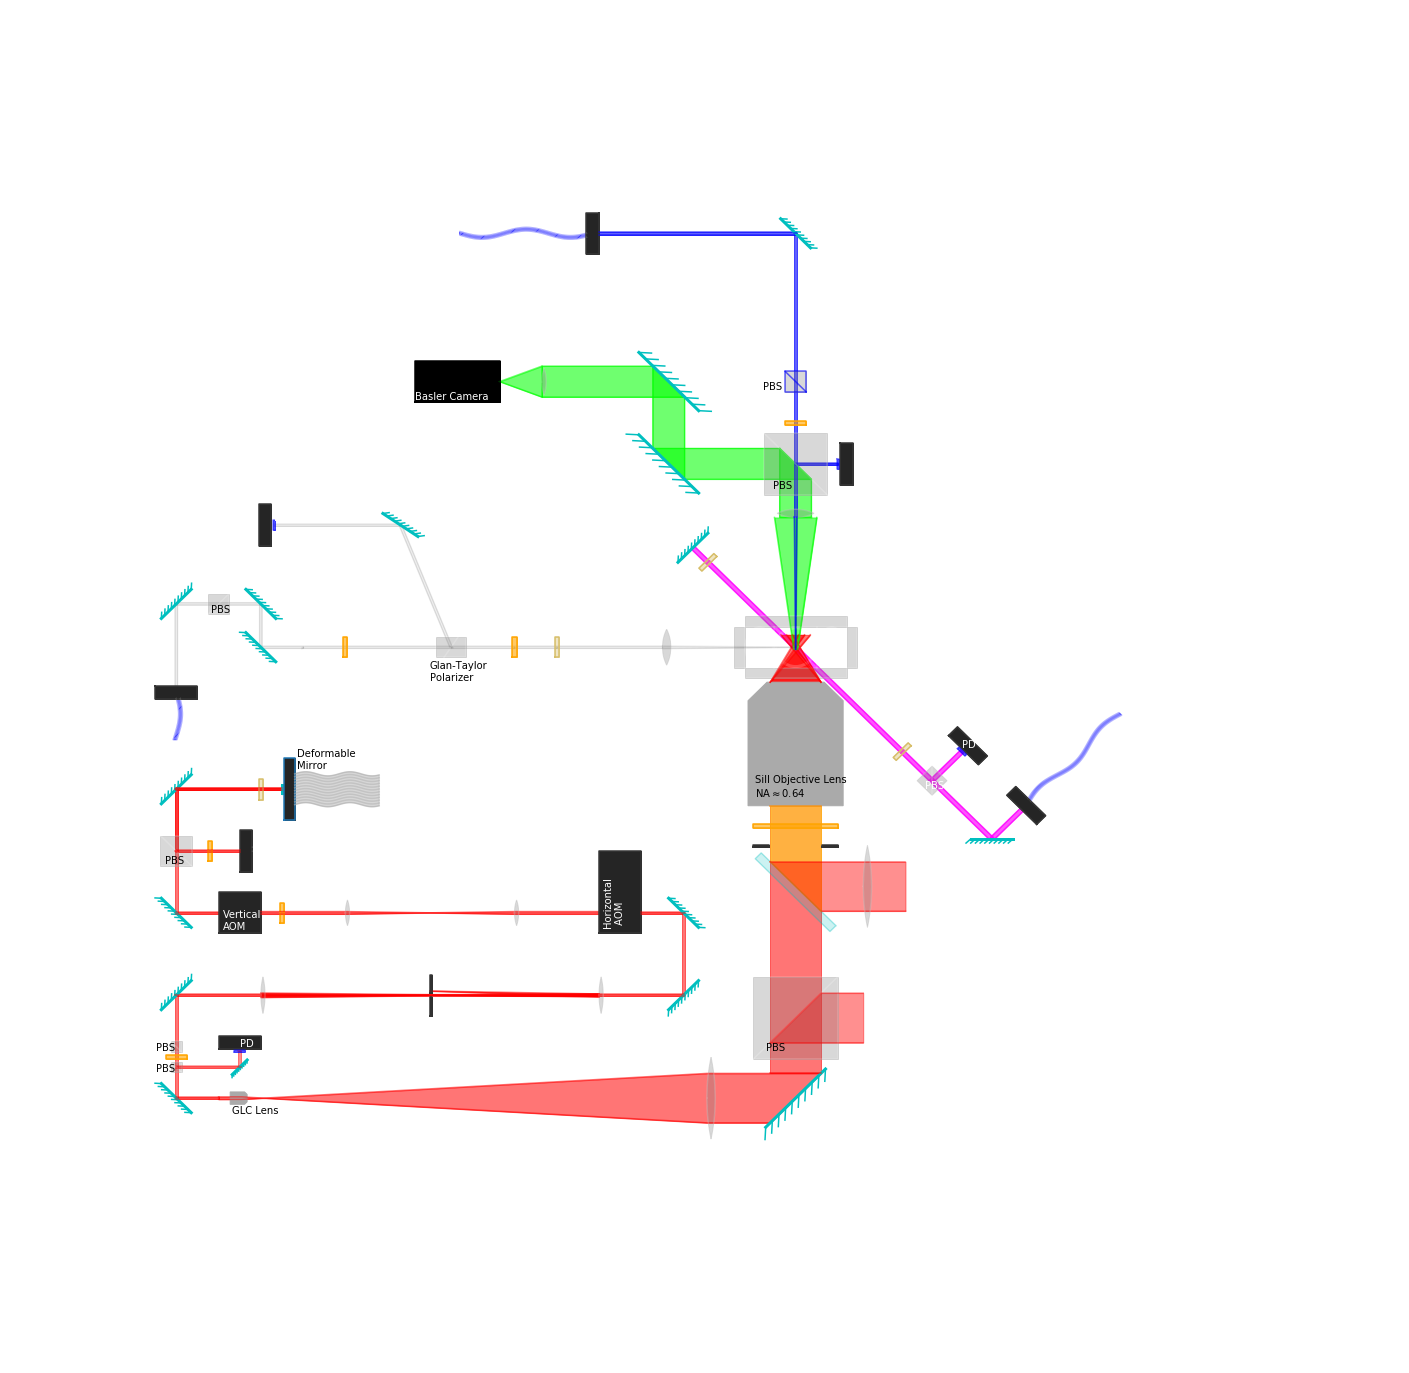

In [155]:
figScale=25
tweezerRail(lensargs={'color':'w', 'alpha':0.2}, figScale=figScale, lensFillArgs={'color':'#808080', 'alpha':0.3}, baseFontSize=8, bgColor='w', textColor='k',
            laserColors={"Tweezer":"#FF00008A", "Tweezer-Pickoff":"#FF000070", '795':'#FFFF0070', 
                         "Sidemot":'#FF00FFAA', 'Imaging':'#FFFF0070', '780':'#FF000070', 'Mot':'#00FF0090', 'Axial':'#0000FFA0', "Eom":'#11111111'});

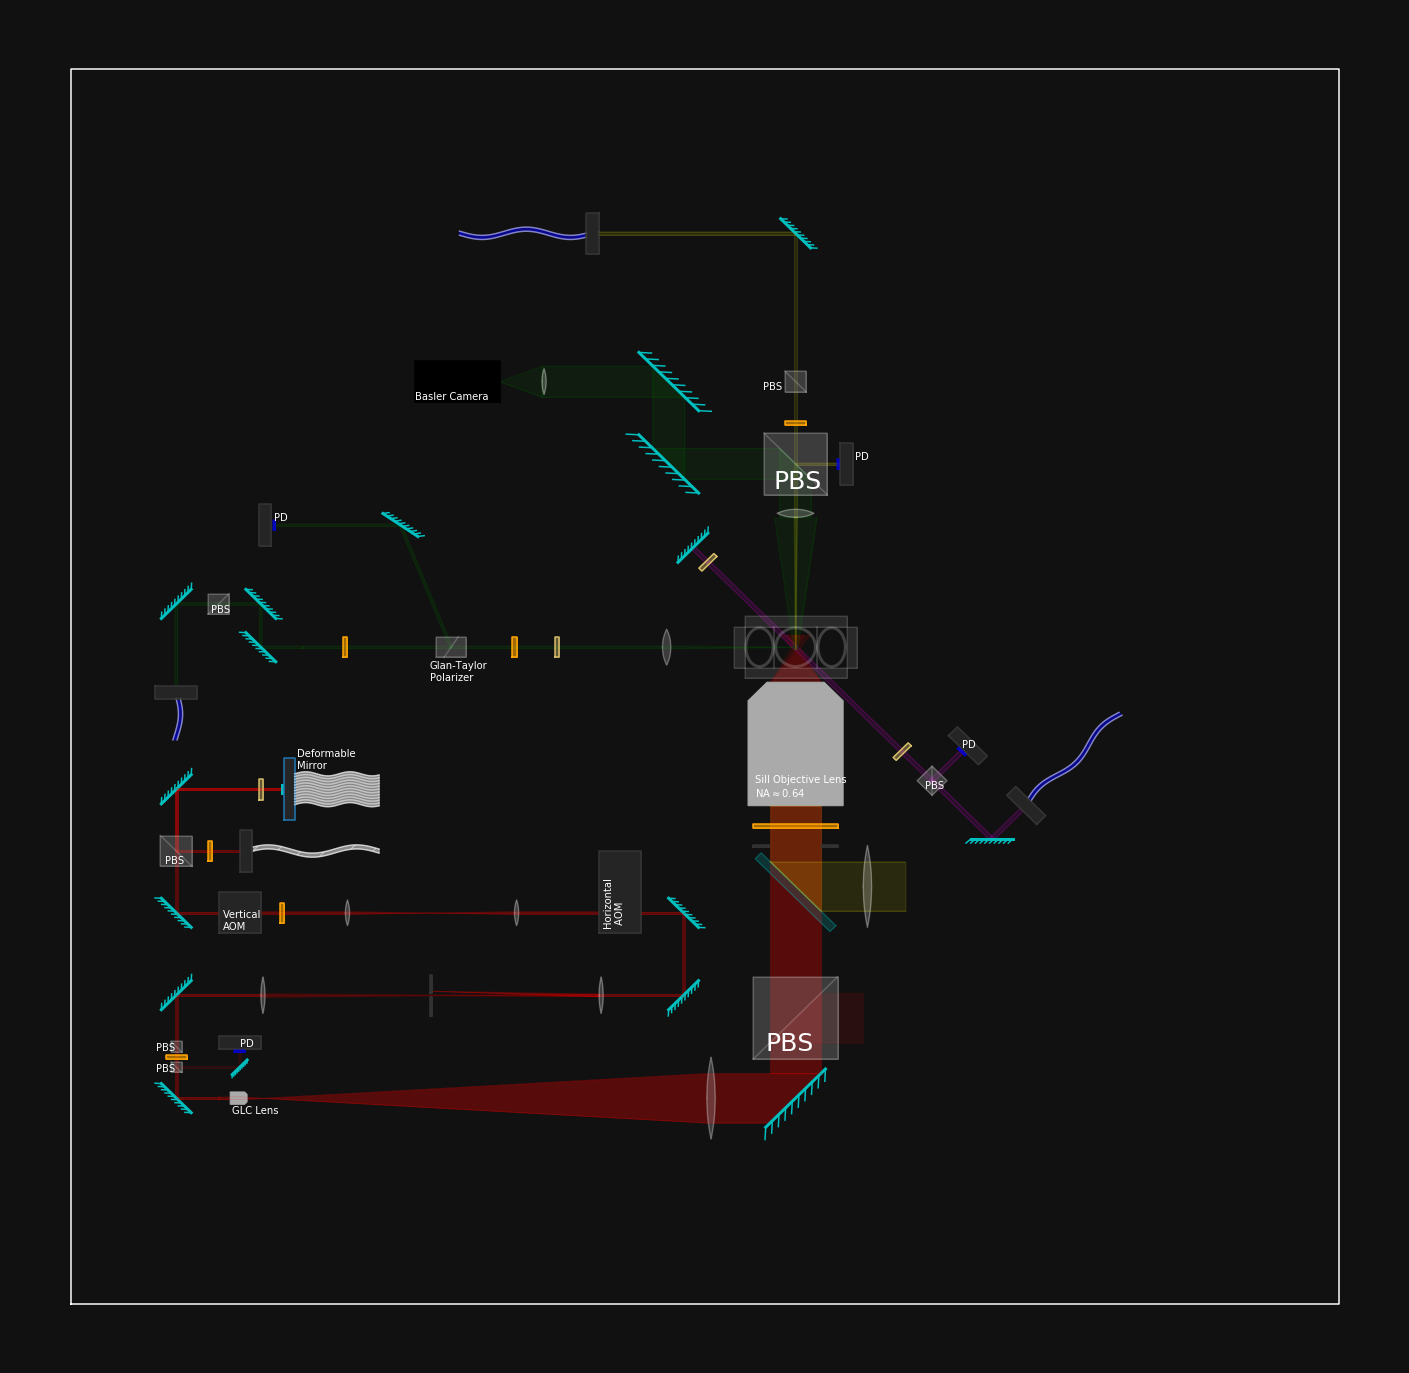

In [40]:
figScale=25
tweezerRail(lensargs={'color':'w', 'alpha':0.2}, figScale=figScale, lensFillArgs={'color':'#A0A0A0', 'alpha':0.3}, baseFontSize=8);

In [124]:
from copy import copy

# LGM Laser Setup

In [114]:
electronicsCableColor='#303030'

In [545]:
def dbrHead(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, theta=0, heatSinkEmph={'color':'#505050'}):
    sizeScale=1
    rect2(ax, x, y, sizeScale*1.3, sizeScale*1, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    for xoff in sizeScale*np.array([0, -0.2, -0.4]):
        offset1 = rotate(xoff, 0, theta)
        rect2(ax, x+offset1[0], y+offset1[1], 0.01*sizeScale, 1*sizeScale, plotArgs={'color':'none'}, fillArgs=heatSinkEmph, theta=theta)
    cableHeadOffset = rotate(-0.7*sizeScale, 0, theta)
    cableHeadTh = 0.2*sizeScale
    rect2(ax, x-cableHeadOffset[0], y+cableHeadOffset[1], cableHeadTh, 0.3*sizeScale, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    cableOffset = rotate(-0.7*sizeScale-cableHeadTh/2, 0, theta)
    cable2(ax, x + cableOffset[0], y + cableOffset[1], 1*sizeScale, theta=theta+np.pi, vScale=0.1, 
           cableFillArgs={'color':electronicsCableColor}, cablePlotArgs={'color':electronicsCableColor});
    fox, foy = rotate(sizeScale*0.65, 0, theta)
    return x + fox, y+foy

In [706]:
def isolator(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, theta=0):
    ss=1
    isoOffX, isoOffY = rotate(ss*1, 0, theta)
    rect2(ax, x+isoOffX, y+isoOffY, ss*2, ss*1, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    isoArrowPx1, isoArrowPy1 = rotate(1.5*ss, 0, theta)
    isoArrowPx2, isoArrowPy2 = rotate(0.5*ss, 0, theta)
    plt.annotate("", xy=(x+isoArrowPx1, y+isoArrowPy1), xytext=(x+isoArrowPx2, y+isoArrowPy2), arrowprops=dict(arrowstyle="->", color='w'))

In [721]:
def prismPair(ax, x, y, theta=0, lensargs={}, fillargs=None):
    if fillargs == None:
        fillargs = lensargs
    scale = 0.5
    prism1Pts = scale*np.array([[-0.35, -0.6], [-0.35, +0.0], [+0.55, -0.3]])
    rPrism1Pts = np.array([rotate(p[0],p[1], theta) for p in prism1Pts])
    
    prism2Pts = scale*np.array([[0.35, 0.], [0.35, +0.6], [-0.55, 0.3]])
    rPrism2Pts = np.array([rotate(p[0],p[1], theta) for p in prism2Pts])
    
    ax.plot(x+rPrism1Pts[:,0], y+rPrism1Pts[:,1], **lensargs)
    ax.fill(x+rPrism1Pts[:,0], y+rPrism1Pts[:,1], **fillargs)    
    
    ax.plot(x+rPrism2Pts[:,0], y+rPrism2Pts[:,1], **lensargs)
    ax.fill(x+rPrism2Pts[:,0], y+rPrism2Pts[:,1], **fillargs)
    

In [1109]:
def eom(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, crystalArgs={}, theta=0):
    ss=1
    eoOffX, eoOffY = rotate(ss*0.5, 0, theta)
    rect2(ax, x+eoOffX, y+eoOffY, ss*2, ss*0.5, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    rect2(ax, x, y, ss*0.2, ss*0.5, plotArgs=crystalArgs, fillArgs=crystalArgs, theta=theta)

In [1268]:
def rbCell(ax, x, y, plotArgs={}, fillArgs={}, theta=0):
    ss=1
    rect2(ax, x, y, ss*1, ss*3.5, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    xpts = np.linspace(0.5, 0.75, 20)
    ypts1 = xpts**2
    ypts2 = 0.5*xpts**2+0.25
    pts = [[x,y] for x, y in zip(xpts, ypts1)]
    pts2 = [[x,y] for x, y in zip(list(reversed(xpts)), list(reversed(ypts2)))]
    allPts =  pts + pts2
    rAllPts = np.array([rotate(p[0],p[1],theta) for p in allPts])
    ax.plot(x+rAllPts[:,0], y+rAllPts[:,1], **plotArgs)
    ax.fill(x+rAllPts[:,0], y+rAllPts[:,1], **fillArgs)

In [1293]:
def taBox(ax, x, y, plotArgs={'color':mountColor}, fillArgs={'color':mountFillColor}, glassArgs={}, theta=0):
    ss=1
    boxS=3
    winTh=0.2
    taChipSize=0.5
    # wins
    rect2(ax, x+winTh/2, y, ss*winTh, ss*1, plotArgs=glassArgs, fillArgs=glassArgs, theta=theta)
    rect2(ax, x+boxS*ss+3*winTh/2, y, ss*winTh, ss*1, plotArgs=glassArgs, fillArgs=glassArgs, theta=theta)
    # box
    rect2(ax, x+boxS*ss/2+winTh, y, ss*boxS, ss*boxS, plotArgs=plotArgs, fillArgs=fillArgs, theta=theta)
    # cutout
    ax.add_artist(plt.Circle((x+boxS*ss/2+winTh, y), 1, color='#050505'))
    #
    rect2(ax, x+boxS*ss/2+winTh, y, ss*taChipSize*1.5, ss*taChipSize, plotArgs={'color':'y', 'alpha':1}, fillArgs={'color':'#ffd100', 'alpha':1, 'zorder':5}, theta=theta)
    x0 = x+boxS*ss/2+winTh
    xpoints = [x0-ss*taChipSize*0.75, x0, x0+ss*taChipSize*0.75, x0+ss*taChipSize*0.75, x0, x0-ss*taChipSize*0.75,]
    ypoints = [y+ss*taChipSize/10, y+ss*taChipSize/10, y+ss*taChipSize/2.1, y-ss*taChipSize/2.1, y-ss*taChipSize/10, y-ss*taChipSize/10]
    plt.fill(xpoints, ypoints, color='#996515',zorder=10)
    return x+boxS*ss+2*winTh, y

In [71]:
def D1LaserSetup():
    figScale, figBoxScale = 15,10
    bgColor='#111111'
    lensargs={'color':'w', 'alpha':0.2}
    lensFillArgs={'color':'#A0A0A0', 'alpha':0.3}
    ### SETUP
    stretch = 2
    fig, ax = plt.subplots(figsize=(stretch*figScale,figScale))
    fig.set_facecolor(bgColor)
    ax.axis("off")
    # Invisible boundary to prevent auto-zoom
    xoff = -0.25*figBoxScale
    x1, x2 = xoff, 3*stretch*figBoxScale+xoff
    yoff = -0.5*figBoxScale
    y1, y2 = yoff, 3*figBoxScale+yoff
    ax.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], color='w');1

    ### Spectroscopy Setup
    ssLaserArgs = {"color":'r', 'linewidth':0.5, 'alpha':0.3}
    ssTh=0.1
    specHx, specHy = 0,5
    specHx, specHy = dbrHead(ax, specHx, specHy, theta=np.pi/2)
    prismPair(ax, specHx, specHy+0.8, lensargs=lensargs, fillargs=lensFillArgs)
    specHx, specHy = laserZ(ax, specHx, specHy, ssTh, 5, ssLaserArgs, theta=np.pi/2 )
    isolator(ax, specHx, specHy-3, theta=np.pi/2)
    specHx, specHy = laserZ(ax, specHx, specHy, ssTh, 3, ssLaserArgs, theta=np.pi/2 )
    isolator(ax, specHx, specHy-3, theta=np.pi/2)
    mirror(ax, specHx, specHy, theta=np.pi/4)
    specHx, specHy = laserZ(ax, specHx, specHy, ssTh, 2, ssLaserArgs, theta=0 )
    mirror(ax, specHx, specHy, theta=-np.pi/4)
    specHx, specHy = laserZ(ax, specHx, specHy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    fiberLauncher2(ax, specHx, specHy, theta=-np.pi/2, fiberLength=1)
    ### sat spec line
    expandedLW = 0.35
    ssx, ssy = 4, 12
    fiberLauncher2(ax, ssx, ssy, theta=np.pi/2, fiberLength=1)
    ssx, ssy = laserZ(ax, ssx, ssy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    halfWaveplate(ax, ssx, ssy, theta=np.pi/2)
    ssx, ssy = laserZ(ax, ssx, ssy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    cube(ax, ssx, ssy, 0.5, plotArgs=lensargs, fillArgs=lensFillArgs, textXAdjust=-1, theta=np.pi/2)
    
    ### pickoff for offset lock
    sspoffx, sspoffy = ssx, ssy
    sspoffx, sspoffy = laserZ(ax, sspoffx, sspoffy, ssTh, 3, ssLaserArgs, theta=0 )
    mirror(ax, sspoffx, sspoffy, theta=-np.pi/4)
    sspoffx, sspoffy = laserZ(ax, sspoffx, sspoffy, ssTh, 2, ssLaserArgs, theta=-np.pi/2 )
    mirror(ax, sspoffx, sspoffy, theta=3*np.pi/4)
    sspoffx, sspoffy = laserZ(ax, sspoffx, sspoffy, ssTh, 3, ssLaserArgs, theta=0 )
    cube(ax, sspoffx, sspoffy, 0.5, plotArgs=lensargs, fillArgs=lensFillArgs, text='NPBS', textXAdjust=0.5)
    sspoffx, sspoffy = laserZ(ax, sspoffx, sspoffy, ssTh, 1, ssLaserArgs, theta=np.pi/2 )
    photodetector(ax, sspoffx, sspoffy)

    # back to sat spec
    ssx, ssy = laserZ(ax, ssx, ssy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    halfWaveplate(ax, ssx, ssy, theta=np.pi/2)
    ssx, ssy = laserZ(ax, ssx, ssy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    eom(ax, ssx, ssy, crystalArgs=lensargs)
    ssx, ssy = laserZ(ax, ssx, ssy, ssTh, 6, ssLaserArgs, theta=-np.pi/2 )
    lens(ax, ssx, ssy, 0.2, 0.5, lensargs, theta=np.pi/2)
    focusingTweezerArray( ax, ssx, ssy, ssTh, focalLength=-.5, laserargs=ssLaserArgs, orientation='vert', 
                          distanceBeyondF=0, nt=1 )
    ssy -= 0.5
    mirror(ax, ssx, ssy, theta=3*np.pi/4)
    ssx += 8
    focusingTweezerArray( ax, ssx, ssy, expandedLW, focalLength=-8, laserargs=ssLaserArgs, orientation='hor', 
                          distanceBeyondF=0, nt=1 )

    lens(ax, ssx, ssy, 0.1, 1, lensargs, theta=0)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 1, ssLaserArgs, theta=0 )
    mirror(ax, ssx, ssy, theta=5*np.pi/4)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 2, ssLaserArgs, theta=np.pi/2 )
    mirror(ax, ssx, ssy, theta=-np.pi/4)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 1, ssLaserArgs, theta=np.pi )
    halfWaveplate(ax,ssx, ssy)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 1, ssLaserArgs, theta=np.pi, endSl=1 )
    
    cube(ax, ssx, ssy, 1, plotArgs=lensargs, fillArgs=lensFillArgs, textXAdjust=-1, theta=np.pi/2)
    sspumpx, sspumpy = ssx, ssy
    sspumpx, sspumpy = laserZ(ax, sspumpx, sspumpy, expandedLW, 2, ssLaserArgs, theta=np.pi/2, endSl=-1, startSl=-1 )
    mirror(ax, sspumpx, sspumpy, theta=-np.pi/4)
    sspumpx, sspumpy = laserZ(ax, sspumpx, sspumpy, expandedLW, 5, ssLaserArgs, theta=np.pi, endSl=-1, startSl=1)
    mirror(ax, sspumpx, sspumpy, theta=np.pi/4)
    sspumpx, sspumpy = laserZ(ax, sspumpx, sspumpy, expandedLW, 2, ssLaserArgs, theta=-np.pi/2, endSl=-1, startSl=1 )
  
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 5, ssLaserArgs, theta=np.pi,endSl=1, startSl=1 )
    rbCell(ax, ssx+2.5, ssy, plotArgs=lensargs, fillArgs=lensFillArgs, theta=np.pi/2)
    
    cube(ax, ssx, ssy, 1, plotArgs=lensargs, fillArgs=lensFillArgs, textXAdjust=-1, theta=np.pi/2)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 4, ssLaserArgs, theta=np.pi, startSl=1 )
    mirror(ax, ssx, ssy, theta=3*np.pi/4)
    ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 1, ssLaserArgs, theta=np.pi/2 )
    lens(ax, ssx, ssy, 0.2, 0.3, lensargs, theta=np.pi/2)
    focusingTweezerArray(ax, ssx, ssy, expandedLW, focalLength=0.5, laserargs=ssLaserArgs, orientation='vert', 
                         distanceBeyondF=0, nt=1)
    ssy += 0.5
    #ssx, ssy = laserZ(ax, ssx, ssy, expandedLW, 0.5, ssLaserArgs, theta=np.pi/2 )
    photodetector(ax, ssx, ssy)
    
    ### active laser head
    workHx, workHy = 17,11
    workHx, workHy = dbrHead(ax, workHx, workHy, theta=np.pi/2)
    prismPair(ax, workHx, workHy+0.8, lensargs=lensargs, fillargs=lensFillArgs)
    workHx, workHy = laserZ(ax, workHx, workHy, ssTh, 2, ssLaserArgs, theta=np.pi/2 )
    mirror(ax, workHx, workHy, theta=-np.pi/4)
    workHx, workHy = laserZ(ax, workHx, workHy, ssTh, 7, ssLaserArgs, theta=np.pi )
    isolator(ax, workHx+6, workHy, theta=np.pi)
    isolator(ax, workHx+3, workHy, theta=np.pi)
    mirror(ax, workHx, workHy, theta=np.pi/4)
    workHx, workHy = laserZ(ax, workHx, workHy, ssTh, 2, ssLaserArgs, theta=-np.pi/2 )
    mirror(ax, workHx, workHy, theta=-5*np.pi/4)
    workHx, workHy = laserZ(ax, workHx, workHy, ssTh, 1, ssLaserArgs, theta=0 )
    fiberLauncher2(ax, workHx, workHy, theta=0, fiberLength=1)
    
    ### work laser splitting
    workSx, workSy = workHx+4, workHy-2
    fiberLauncher2(ax, workSx, workSy, theta=np.pi/2, fiberLength=1)
    workSx, workSy = laserZ(ax, workSx, workSy, ssTh, 1, ssLaserArgs, theta=-np.pi/2 )
    halfWaveplate(ax, workSx, workSy, theta=np.pi/2)
    workSx, workSy = laserZ(ax, workSx, workSy, ssTh, 2, ssLaserArgs, theta=-np.pi/2 )
    cube(ax, workSx, workSy, size=0.5, plotArgs=lensargs, fillArgs=lensFillArgs )
    workOffx, workOffy = workSx, workSy
    
    workOffx, workOffy = laserZ(ax, workOffx, workOffy, ssTh, 5, ssLaserArgs, theta=-np.pi )
    halfWaveplate(ax, workOffx+4, workOffy)
    mirror(ax, workOffx, workOffy, theta=3*np.pi/4)
    workOffx, workOffy = laserZ(ax, workOffx, workOffy, ssTh, 1.5, ssLaserArgs, theta=np.pi/2 )
    
    workSx, workSy = laserZ(ax, workSx, workSy, ssTh, 4, ssLaserArgs, theta=-np.pi/2 )
    isolator(ax, workSx, workSy+3, theta=-np.pi/2)
    mirror(ax, workSx, workSy, theta=3*np.pi/4)
    workSx, workSy = laserZ(ax, workSx, workSy, ssTh, 2, ssLaserArgs, theta=0 )
    mirror(ax, workSx, workSy, theta=5*np.pi/4)
    workSx, workSy = laserZ(ax, workSx, workSy, ssTh,2, ssLaserArgs, theta=np.pi/2 )
    fiberLauncher2(ax, workSx, workSy, theta=np.pi/2, fiberLength=1)
    
    ### 3W TA and splitting section
    tax, tay = 24, 14
    fiberLauncher2(ax, tax, tay, theta=np.pi)
    tax, tay = laserZ(ax, tax, tay, ssTh, 1, ssLaserArgs)
    mirror(ax, tax, tay, theta=-np.pi/4)
    tax, tay = laserZ(ax, tax, tay, ssTh, 2, ssLaserArgs, theta=-np.pi/2)
    mirror(ax, tax, tay, theta=3*np.pi/4)
    tax, tay = laserZ(ax, tax, tay, ssTh, 1, ssLaserArgs)
    prismPair(ax, tax, tay, theta=np.pi/2, lensargs=lensargs)
    tax, tay = laserZ(ax, tax, tay, ssTh, 1, ssLaserArgs)
    tax, tay = taBox(ax, tax, tay, glassArgs=lensargs)
    tax, tay = laserZ(ax, tax, tay, ssTh, 4, ssLaserArgs)
    lens(ax, tax, tay, 0.1, 1, lensargs)
    tax, tay = laserZ(ax, tax, tay, ssTh, 1, ssLaserArgs)
    mirror(ax, tax, tay, np.pi/4)
    tax, tay = laserZ(ax, tax, tay, ssTh, 3, ssLaserArgs, theta=-np.pi/2)
    mirror(ax, tax, tay, np.pi/4)
    tax, tay = laserZ(ax, tax, tay, ssTh, 7, ssLaserArgs, theta=np.pi)
    isolator(ax, tax+6, tay, theta=np.pi)
    isolator(ax, tax+3, tay, theta=np.pi)
    cube(ax, tax, tay, size=0.5, plotArgs=lensargs, fillArgs=lensFillArgs)
    tax, tay = laserZ(ax, tax, tay, ssTh, 1, ssLaserArgs, theta=np.pi)
    lens(ax, tax, tay, 0.1, 1, lensargs)
    tax, tay = laserZ(ax, tax, tay, ssTh, 2, ssLaserArgs, theta=np.pi)
    mirror(ax, tax, tay, np.pi/4)
    tax, tay = laserZ(ax, tax, tay, ssTh, 2, ssLaserArgs, theta=-np.pi/2)
    
    
    

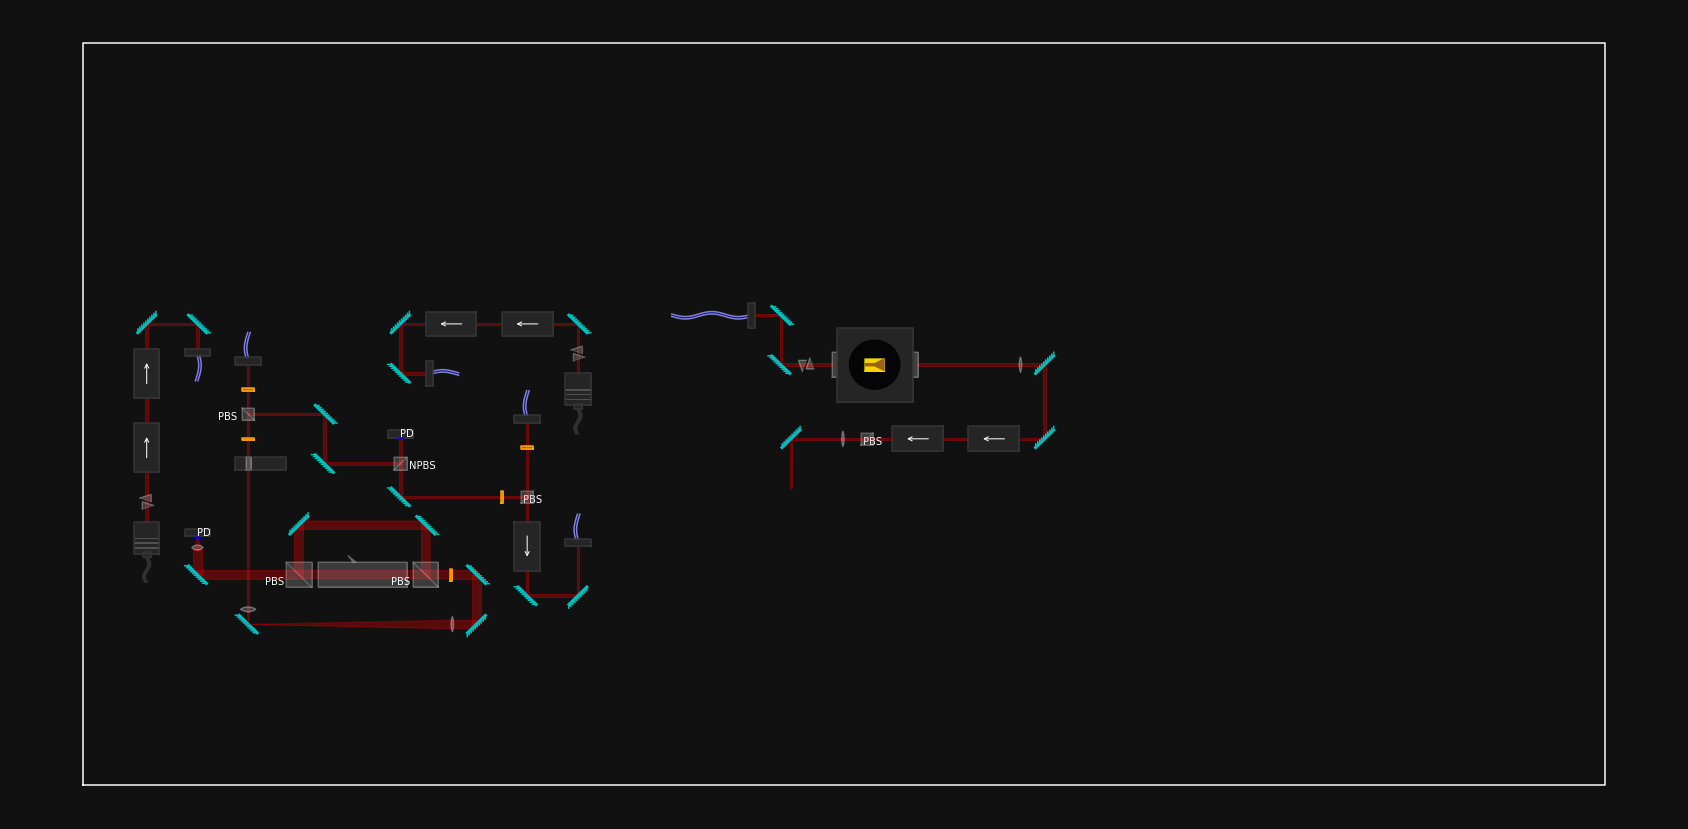

In [1333]:
D1LaserSetup()